In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import gc
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_extraction import extract_features
np.warnings.filterwarnings('ignore')
import dask.dataframe as dd
import missingno as msno
from pandasql import sqldf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import itertools
import pickle, gzip
import glob

In [2]:
#Always seed the randomness of this universe
np.random.seed(51)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
%%time
train_metadata_kaggle = dd.read_csv('mydata_train_metadata.csv')
test_metadata_kaggle = dd.read_csv('mydata_test_metadata.csv')
train_metadata_kaggle = train_metadata_kaggle.compute()
test_metadata_kaggle = test_metadata_kaggle.compute()
print(train_metadata_kaggle.shape,test_metadata_kaggle.shape)

(7848, 142) (3492890, 141)
CPU times: user 3min 23s, sys: 12.4 s, total: 3min 35s
Wall time: 41.9 s


In [5]:
print(train_metadata_kaggle.shape,test_metadata_kaggle.shape)

(7848, 142) (3492890, 141)


In [6]:
train_metadata_kaggle.head()

,object_id,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""","4__fft_coefficient__coeff_1__attr_""abs""",4__kurtosis,4__skewness,"5__fft_coefficient__coeff_0__attr_""abs""","5__fft_coefficient__coeff_1__attr_""abs""",5__kurtosis,5__skewness,flux__length,flux__longest_strike_above_mean,flux__longest_strike_below_mean,flux__mean_abs_change,flux__mean_change,flux_by_flux_ratio_sq__longest_strike_above_mean,flux_by_flux_ratio_sq__longest_strike_below_mean,mjd__mean_abs_change,mjd__mean_change,mjd_diff_det,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,haversine,latlon1,hostgal_photoz_certain,A0_sum_flux,A0_mean_flux,A0_std_detected,A1_mean_detected,A2_sum_detected,A4_mean_detected,A5_std_detected,A5_mean_detected,percent_p2_region_minus_1,A2_min_flux,A5_sum_detected,__flux_percentile_ratio_mid50___5_,__flux_percentile_ratio_mid65___2_,__median_absolute_deviation___2_,__qso_log_chi2_qsonu___0_,__stetson_k___1_,__freq1_signif___2_,__stetson_k___2_,__freq3_amplitude1___1_,__median_absolute_deviation___2_.1,__percent_close_to_median___2_,__freq_varrat___5_,__freq_varrat___4_,__qso_log_chi2_qsonu___3_,__qso_log_chi2_qsonu___1_,__qso_log_chi2_qsonu___5_,__std___4_,__freq_varrat___3_,__amplitude___2_,outlierScore,hipd,lipd,highEnergy_transitory_1.0_TF,highEnergy_transitory_1.5_TF,lowEnergy_transitory_1.0_TF,lowEnergy_transitory_1.5_TF,A1_minus_3_sigma,A5_max_median_diff_flux,A5_minus_3_sigma,A5_max_mean_diff_flux,diff_A5_A4_max_min_flux,diff_A2_A1_max_min_flux,diff_A3_A2_median_min_flux,diff_A5_A4_max_median_flux,diff_A4_A3_max_median_flux,diff_A2_A0_median_min_flux,diff_A4_A3_max_mean_flux,diff_A5_A2_max_mean_flux,diff_A5_A3_max_mean_flux,diff_A4_A0_median_mean_flux,diff_A5_A4_max_mean_flux,diff_A2_A1_max_median_flux,diff_A5_A2_max_median_flux,diff_A5_A4_median_min_flux,diff_A4_A0_median_min_flux,diff_A4_A1_max_median_flux,diff_A4_A2_max_median_flux,diff_A5_A4_minus_1_sigma,diff_A5_A3_median_min_flux,diff_A5_A3_max_median_flux,diff_A3_A1_minus_1_sigma,diff_A3_A0_median_min_flux,diff_A3_A0_plus_1_sigma,diff_A1_A0_median_min_flux,diff_A4_A2_mean_min_flux,diff_A5_A1_plus_1_sigma,diff_A4_A1_median_mean_flux,diff_A3_A2_max_median_flux,diff_A5_A1_median_mean_flux,div_A4_A2_median_min_flux,div_A5_A2_median_min_flux,div_A5_A2_minus_1_sigma,div_A5_A4_median_mean_flux,div_A3_A0_plus_1_sigma,div_A4_A1_minus_1_sigma,A5_median_mean_avg_flux,A4_mean_min_avg_flux,A0_max_mean_avg_flux
0,615,-1100.440063,660.626343,-123.096998,-89.477524,394.109851,-0.349540,2.130510,12.845472,4.482743,3.835268,1.744747,1.623740,0.946023,2.929669e+06,0.812722,-9.601766e+08,-1.414322,-327.742307,1761.066406,-14.306331,-5.373326,205.036926,1628.427737,-1.475181,0.128917,22370.594834,2806.374162,-1.255123,0.415580,7780.500807,2805.598113,-1.409885,0.339918,7024.003068,2536.068846,-1.449858,0.293128,3245.366349,2741.539785,-1.548319,0.200096,2704.641265,2893.344217,-1.592820,0.125268,352.0,19.0,29.0,202.114067,1.999688,35.0,4.0,2.631898,2.631898,873.7903,0.0000,0.0000,NaN,0.017,92,0.319006,-1.528827,0.000000,-205.03693,-3.254554,0.3528,0.9653,57,0.9830,0.2854,0.9120,0.362,-682.000,52,5.562230e-26,6.719410e-20,368.12900,6.217890,1.091730,5.49891,1.053490,114.465000,368.12900,0.172414,0.401664,0.129578,9.16612,9.508750,7.344980,289.27700,0.110785,64

In [7]:
"""%%time
f2_train = dd.read_csv('myfeatures_train_embeddings.csv')
f2_test = dd.read_csv('myfeatures_test_embeddings.csv')
f2_train = f2_train.compute()
f2_test = f2_test.compute()
print(f2_train.shape,f2_test.shape)"""

"%%time\nf2_train = dd.read_csv('myfeatures_train_embeddings.csv')\nf2_test = dd.read_csv('myfeatures_test_embeddings.csv')\nf2_train = f2_train.compute()\nf2_test = f2_test.compute()\nprint(f2_train.shape,f2_test.shape)"

In [8]:
"""%%time
train_metadata_kaggle = train_metadata_kaggle.merge(f2_train,how='left',on = 'object_id')
test_metadata_kaggle = test_metadata_kaggle.merge(f2_test,how='left',on = 'object_id')
print(train_metadata_kaggle.shape,test_metadata_kaggle.shape)"""

"%%time\ntrain_metadata_kaggle = train_metadata_kaggle.merge(f2_train,how='left',on = 'object_id')\ntest_metadata_kaggle = test_metadata_kaggle.merge(f2_test,how='left',on = 'object_id')\nprint(train_metadata_kaggle.shape,test_metadata_kaggle.shape)"

In [9]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

In [10]:
temp = train_metadata_kaggle.copy()

In [11]:
y = temp['target']

In [12]:
del temp['target']

In [13]:
classes = sorted(y.unique())

# Taken from Giba's topic : https://www.kaggle.com/titericz
# https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
# with Kyle Boone's post https://www.kaggle.com/kyleboone
class_weight = {
    c: 1 for c in classes
}
for c in [64, 15]:
    class_weight[c] = 2

print('Unique classes : ', classes)

train_id = temp['object_id']
del temp['object_id']

Unique classes :  [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]


In [14]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=51)

In [15]:
temp.fillna(0.0, inplace=True)

In [16]:
%%time
for i in temp.columns:
    #print(i)
    temp[i].replace(np.inf, 0.0, inplace=True)
    temp[i].replace(-np.inf, 0.0, inplace=True)

CPU times: user 194 ms, sys: 99 µs, total: 194 ms
Wall time: 193 ms


In [17]:
ss = StandardScaler()
full_train_ss = ss.fit_transform(temp)

In [18]:
test_id = test_metadata_kaggle['object_id']

In [19]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.utils import to_categorical
from keras import backend as K
import keras
from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [20]:
from keras.optimizers import Adam, RMSprop

In [21]:
# https://www.kaggle.com/c/PLAsTiCC-2018/discussion/69795
def mywloss(y_true,y_pred):  
    yc=tf.clip_by_value(y_pred,1e-15,1-1e-15)
    loss=-(tf.reduce_mean(tf.reduce_mean(y_true*tf.log(yc),axis=0)/wtable))
    return loss

In [22]:
def multi_weighted_logloss(y_ohe, y_p):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1-1e-15)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set 
    # we gave a special process for that class
    y_log_ones = np.sum(y_ohe * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos    
    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss

In [23]:
from keras.layers import PReLU, ReLU, Activation

In [24]:
K.clear_session()
tf.reset_default_graph()

In [25]:
unique_y = np.unique(y)
class_map = dict()
for i,val in enumerate(unique_y):
    class_map[val] = i
        
y_map = np.zeros((y.shape[0],))
y_map = np.array([class_map[val] for val in y])
y_categorical = to_categorical(y_map)

In [26]:
y_count = Counter(y_map)
wtable = np.zeros((len(unique_y),))
for i in range(len(unique_y)):
    wtable[i] = y_count[i]/y_map.shape[0]

In [27]:
def plot_loss_acc(history):
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.ylabel('val_loss')
    plt.xlabel('epoch')
    plt.legend(['train','Validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['acc'][1:])
    plt.plot(history.history['val_acc'][1:])
    plt.title('model Accuracy')
    plt.ylabel('val_acc')
    plt.xlabel('epoch')
    plt.legend(['train','Validation'], loc='upper left')
    plt.show()

In [28]:
def build_model(dropout_rate=0.25, activation='relu'):
    start_neurons = 256
    # create model
    model = Sequential()
    
    model.add(Dense(start_neurons, input_dim=full_train_ss.shape[1], activation=None))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//2,activation=None))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//4,activation=None))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(len(classes), activation='softmax'))
    
    return model

fold_0 started


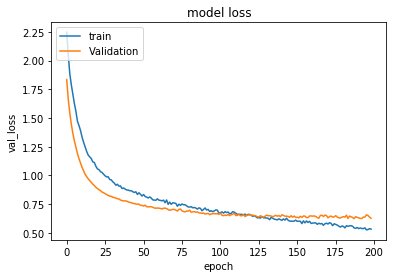

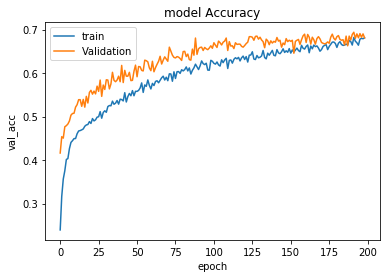

Loading Best Model
0.6187386171944153
fold_1 started


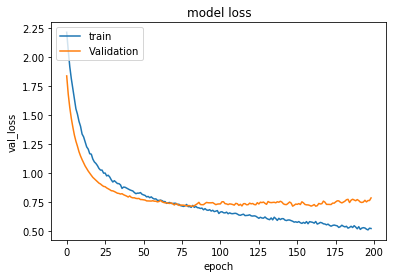

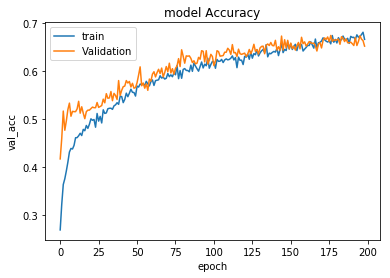

Loading Best Model
0.7097225382738396
fold_2 started


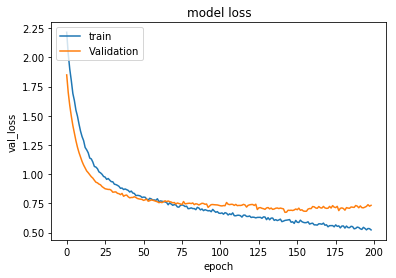

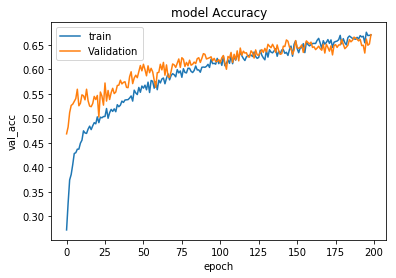

Loading Best Model
0.6637495175697484
fold_3 started


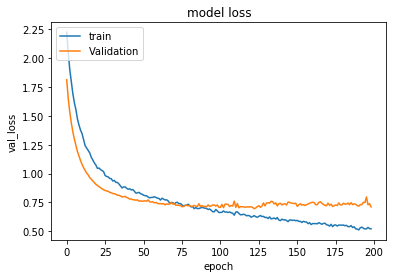

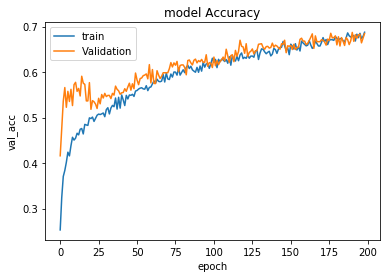

Loading Best Model
0.6827089598743176
fold_4 started


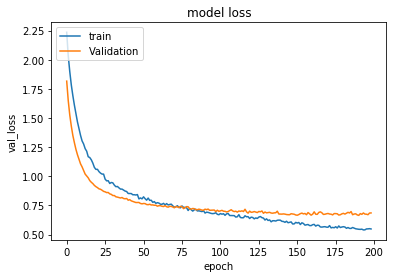

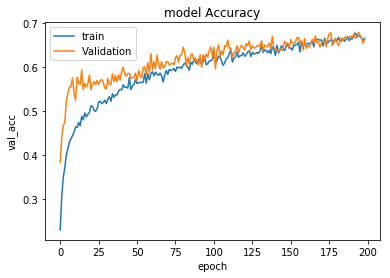

Loading Best Model
0.65924125363994
MULTI WEIGHTED LOG LOSS : 0.66676 
CPU times: user 4min 55s, sys: 35.2 s, total: 5min 31s
Wall time: 2min 52s


In [29]:
%%time
clfs = []
oof_preds = np.zeros((len(full_train_ss), len(classes)))
epochs = 200
batch_size = 256

for fold_, (trn_, val_) in enumerate(folds.split(y_map, y_map)):
    checkPoint = ModelCheckpoint("./keras.model",monitor='val_loss',mode = 'min', save_best_only=True, verbose=0)
    x_train, y_train = full_train_ss[trn_], y_categorical[trn_]
    x_valid, y_valid = full_train_ss[val_], y_categorical[val_]
    
    #trn_xa, trn_y, val_xa, val_y=smoteAdataset(x_train, y_train, x_valid, y_valid)
    #x_train=pd.DataFrame(data=trn_xa, columns=x_train.columns)
    #x_valid=pd.DataFrame(data=val_xa, columns=x_valid.columns)
    print("fold_{} started".format(fold_))
    
    K.clear_session()
    model = build_model(dropout_rate=0.30, activation='sigmoid')
    adam = Adam(lr = 0.0009)
    model.compile(loss=mywloss, optimizer=adam, metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    validation_data=[x_valid, y_valid], 
                    epochs=epochs,
                    batch_size=batch_size,shuffle=True,verbose=0,callbacks=[checkPoint])       
    
    plot_loss_acc(history)
    
    print('Loading Best Model')
    model.load_weights('./keras.model')
    # # Get predicted probabilities for each class
    oof_preds[val_, :] = model.predict_proba(x_valid,batch_size=batch_size)
    print(multi_weighted_logloss(y_valid, model.predict_proba(x_valid,batch_size=batch_size)))
    clfs.append(model)
    
print('MULTI WEIGHTED LOG LOSS : %.5f ' % multi_weighted_logloss(y_categorical,oof_preds))

In [30]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_map, np.argmax(oof_preds,axis=-1))
np.set_printoptions(precision=2)

In [32]:
sample_sub = pd.read_csv('sample_submission.csv')
class_names = list(sample_sub.columns[1:-1])
#del sample_sub;gc.collect()

Normalized confusion matrix
[[9.47e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.62e-03 0.00e+00 0.00e+00
  4.64e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 7.64e-01 0.00e+00 2.83e-02 3.03e-02 0.00e+00 3.84e-02 2.22e-02
  0.00e+00 4.65e-02 4.04e-03 5.45e-02 0.00e+00 1.21e-02]
 [2.16e-03 1.08e-03 9.82e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  9.74e-03 0.00e+00 0.00e+00 0.00e+00 5.41e-03 0.00e+00]
 [0.00e+00 1.09e-01 0.00e+00 2.44e-01 1.46e-01 0.00e+00 1.93e-01 2.85e-02
  0.00e+00 9.22e-02 8.38e-04 1.45e-01 0.00e+00 4.19e-02]
 [0.00e+00 3.28e-02 0.00e+00 9.29e-02 3.50e-01 0.00e+00 1.15e-01 2.19e-02
  0.00e+00 1.37e-01 0.00e+00 2.40e-01 0.00e+00 1.09e-02]
 [3.33e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.67e-01 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.89e-02 0.00e+00 9.92e-02 9.09e-02 0.00e+00 4.09e-01 7.02e-02
  0.00e+00 2.21e-01 0.00e+00 6.20e-02 0.00e+00 1.86e-02]
 [0.00e+00 1.96e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00

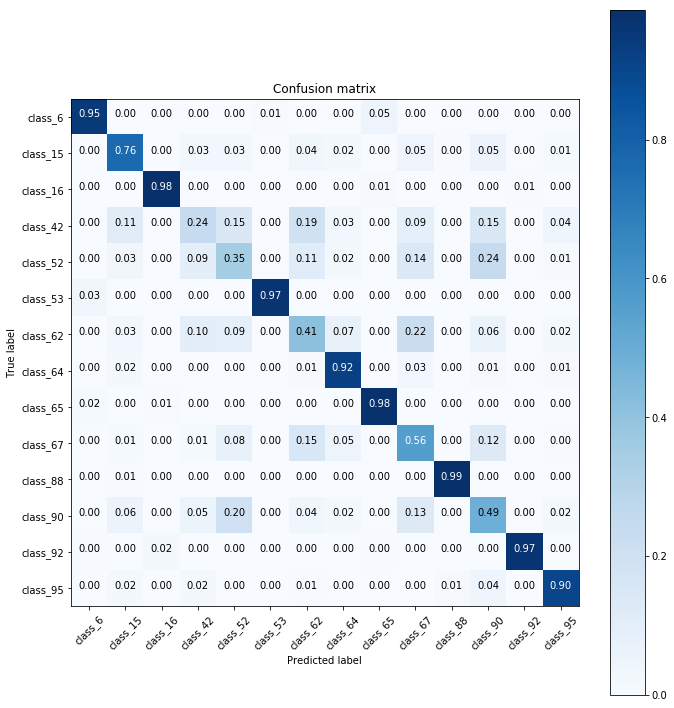

In [33]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
foo = plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                      title='Confusion matrix')

In [34]:
print(len(clfs))

5


In [35]:
%%time
temp_test = test_metadata_kaggle.copy()

CPU times: user 2.23 s, sys: 3.5 s, total: 5.73 s
Wall time: 5.73 s


In [36]:
gc.enable()
del train_metadata_kaggle,test_metadata_kaggle
gc.collect()

31764

In [38]:
del temp_test['object_id']

In [39]:
list(temp.columns) == list(temp_test.columns)

True

In [40]:
temp_test.fillna(0, inplace=True)

In [41]:
%%time
for i in temp_test.columns:
    #print(i)
    temp_test[i].replace(np.inf, 0, inplace=True)
    temp_test[i].replace(-np.inf, 0, inplace=True)

CPU times: user 6.09 s, sys: 182 ms, total: 6.27 s
Wall time: 6.26 s


In [42]:
temp_test = ss.transform(temp_test)

In [43]:
%%time
test_pred0 = pd.DataFrame()
test_pred1 = pd.DataFrame()
test_pred2 = pd.DataFrame()
test_pred3 = pd.DataFrame()
test_pred4 = pd.DataFrame()

list_of_df = [test_pred0,test_pred1,test_pred2,test_pred3,test_pred4]

for num,c in enumerate(clfs):
    print(num)
    for k in range(0,len(temp_test),500000):
        test_pred = pd.DataFrame(c.predict_proba(temp_test[ k:k+500000] ))
        list_of_df[num] = pd.concat([list_of_df[num],test_pred],axis=0)
        del test_pred

0
1
2
3
4
CPU times: user 14min 24s, sys: 1min 46s, total: 16min 10s
Wall time: 8min 42s


In [44]:
test_pred2 = pd.DataFrame()
test_pred2 = (list_of_df[0] + list_of_df[1] + list_of_df[2] + list_of_df[3] + list_of_df[4])/5

In [45]:
print(test_pred2.shape)

(3492890, 14)


In [46]:
#test_pred2 = pd.DataFrame(np.random.rand(10,14))

In [47]:
test_pred2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,9.119455e-05,0.001074,1.084584e-05,0.667768,0.009357,0.000008,0.308930,0.000004,3.203546e-06,0.001031,3.089718e-08,0.011400,1.990122e-07,0.000323
1,2.673742e-07,0.009020,2.184344e-07,0.187359,0.113472,0.000004,0.005956,0.000004,2.182655e-05,0.001323,7.033586e-05,0.680674,1.822604e-07,0.002096
2,4.230055e-07,0.011352,2.750550e-07,0.124236,0.083782,0.000020,0.007590,0.000009,2.306520e-06,0.005592,2.111515e-04,0.739287,2.558739e-07,0.027918
3,6.824003e-07,0.001477,7.109454e-07,0.083277,0.122099,0.000002,0.049916,0.000044,3.202802e-07,0.304178,2.159228e-06,0.436740,3.375267e-07,0.002263
4,9.677261e-08,0.001540,4.785564e-08,0.061013,0.296298,0.000002,0.020881,0.000003,7.818906e-07,0.069358,1.169263e-06,0.550829,1.452626e-07,0.000075


In [48]:
temp_columns = ['object_id','class_6','class_15','class_16','class_42','class_52','class_53','class_62','class_64','class_65','class_67','class_88','class_90','class_92','class_95','class_99']

In [49]:
test_pred2.columns = temp_columns[1:15]

In [50]:
def getUnknown(data):
    return ((((((data["mymedian"]) + (((data["mymean"]) / 2.0)))/2.0)) + (((((1.0) - (((data["mymax"]) * (((data["mymax"]) * (data["mymax"]))))))) / 2.0)))/2.0)

feats = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53',
         'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90',
         'class_92', 'class_95']

In [51]:
klm = pd.DataFrame()
klm['mymean'] = test_pred2[feats].mean(axis=1)
klm['mymedian'] = test_pred2[feats].median(axis=1)
klm['mymax'] = test_pred2[feats].max(axis=1)

In [52]:
test_pred2['class_99'] = getUnknown(klm)

In [53]:
test_pred2.tail()

,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95,class_99
492885,1.820920e-08,0.209286,8.903779e-07,0.162925,0.189883,3.558269e-06,0.022055,0.000007,5.664233e-06,0.007449,1.996857e-04,0.408075,0.000003,0.000106,0.241978
492886,7.091237e-06,0.045229,3.168180e-05,0.102872,0.231397,1.800730e-05,0.025547,0.004042,1.745772e-06,0.047355,2.128696e-04,0.540899,0.000011,0.002377,0.220168
492887,1.268237e-05,0.013916,4.066181e-06,0.650026,0.057726,7.265320e-06,0.233190,0.000001,1.789754e-07,0.001144,9.393539e-07,0.042699,0.000002,0.001271,0.190409
492888,1.977501e-07,0.860891,1.703486e-05,0.084237,0.003025,1.513774e-05,0.005869,0.004325,2.100030e-05,0.000212,1.929439e-05,0.041018,0.000020,0.000331,0.099488
492889,3.833140e-08,0.100795,1.707139e-06,0.361305,0.082475,6.872540e-07,0.020157,0.000046,5.272315e-04,0.001972,1.850475e-04,0.432452,0.000005,0.000079,0.238799


In [54]:
test_pred2 = test_pred2.reset_index(drop=True)

In [55]:
print(test_pred2.shape,test_id.shape)

(3492890, 15) (3492890,)


In [56]:
test_id.tail()

9697    130787966
9698    130787971
9699    130787974
9700    130788053
9701    130788054
Name: object_id, dtype: int64

In [57]:
test_id = test_id.reset_index(drop=True)

In [58]:
test_id.index == test_pred2.index

array([ True,  True,  True, ...,  True,  True,  True])

In [59]:
%%time
test_pred = pd.concat([test_id,test_pred2],axis=1)

CPU times: user 44.7 ms, sys: 100 ms, total: 145 ms
Wall time: 144 ms


In [60]:
test_pred = test_pred[temp_columns]

In [61]:
test_pred.head()

,object_id,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95,class_99
0,13,9.119455e-05,0.001074,1.084584e-05,0.667768,0.009357,0.000008,0.308930,0.000004,3.203546e-06,0.001031,3.089718e-08,0.011400,1.990122e-07,0.000323,0.184539
1,14,2.673742e-07,0.009020,2.184344e-07,0.187359,0.113472,0.000004,0.005956,0.000004,2.182655e-05,0.001323,7.033586e-05,0.680674,1.822604e-07,0.002096,0.180261
2,17,4.230055e-07,0.011352,2.750550e-07,0.124236,0.083782,0.000020,0.007590,0.000009,2.306520e-06,0.005592,2.111515e-04,0.739287,2.558739e-07,0.027918,0.158640
3,23,6.824003e-07,0.001477,7.109454e-07,0.083277,0.122099,0.000002,0.049916,0.000044,3.202802e-07,0.304178,2.159228e-06,0.436740,3.375267e-07,0.002263,0.238293
4,34,9.677261e-08,0.001540,4.785564e-08,0.061013,0.296298,0.000002,0.020881,0.000003,7.818906e-07,0.069358,1.169263e-06,0.550829,1.452626e-07,0.000075,0.217156


In [62]:
print(test_pred.shape)

(3492890, 16)


In [63]:
%%time
test_pred.to_csv('test_pred_46.csv',index=False)

CPU times: user 1min 3s, sys: 92.2 ms, total: 1min 3s
Wall time: 1min 3s


In [ ]:
#!kaggle competitions submit -c PLAsTiCC-2018 -f test_pred_21.csv -m "Message"